In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pickle
import MDAnalysis
from MDAnalysis.analysis import rdf
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_6363/2540733804.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
def extract_form_log(fn):
    lines=open(fn,'r').readlines()
    start=np.where([('Step' in l) for l in lines])[-1][0]
    data={keyi.lower(): []  for keyi in lines[start].split()}
    for l in lines[start+1:]:
        ls=l.split()
        try:
            if ls[0].isdigit():
                for i, key in enumerate(data.keys()):
                    data[key].append(float(ls[i]))
        
            else:
                break
        except:
            break
    for key in data.keys():
        data[key]=np.array(data[key])
    return data

In [3]:
sims=dict()
for f in glob.glob('*_*/log.lammps'):
    try:
        sims[f.replace('/log.lammps','')]=extract_form_log(f)
    except:
        pass

with open('1-bulk.pickle', 'wb') as handle:
    pickle.dump(sims, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('1-bulk.pickle', 'rb') as handle:
    sims = pickle.load(handle)
print(sims.keys())

dict_keys(['IceII_1000atm_230K', 'IceII_2000atm_240K', 'IceII_1000atm_245K', 'IceII_2000atm_250K', 'IceII_2000atm_235K', 'IceII_2000atm_245K', 'IceII_1000atm_250K', 'IceII_1000atm_235K', 'IceII_1000atm_240K', 'IceII_2000atm_255K'])


### Volume for different pressures

IceII_1000atm_230K
IceII_2000atm_240K
IceII_1000atm_245K
IceII_2000atm_250K
IceII_2000atm_235K
IceII_2000atm_245K
IceII_1000atm_250K
IceII_1000atm_235K
IceII_1000atm_240K
IceII_2000atm_255K
[[ 1000.         22267.37204261]
 [ 2000.         22185.11384687]
 [ 1000.         22346.01406924]
 [ 2000.         22237.78878961]
 [ 2000.         22156.62595739]
 [ 2000.         22208.45513449]
 [ 1000.         22377.50056991]
 [ 1000.         22287.1802024 ]
 [ 1000.         22318.30250067]
 [ 2000.         22267.09713981]]


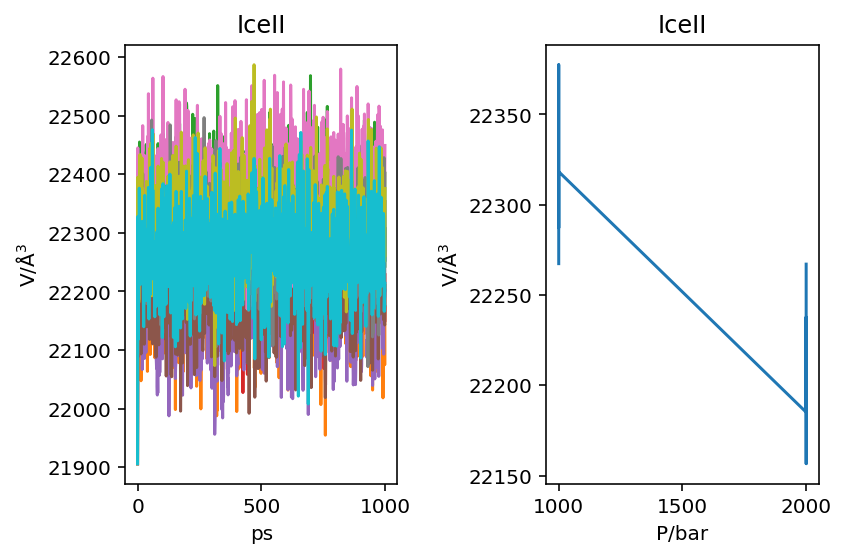

In [4]:
NIGNORE=int(250/(2./1000)/(500))


plt.subplot(121)
plt.title('IceII')
vol_ice=[]
for key in sims.keys():
    print(key)
    ls=key.split('_')
    p=float(ls[1].replace('atm',''))
    t=float(ls[2].replace('K',''))
    if 'IceII' in key:
        sim=sims[key]
        vol_ice.append([p,np.mean(sim['volume'][NIGNORE:])])
        try:
            plt.plot(sim['step']*2/1000,sim['volume'],label=key)
        except:
            pass
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
plt.subplot(122)
plt.title('IceII')
vol_ice=np.array(vol_ice)
vol_ice=vol_ice[np.argsort(vol_ice[:,0])]
plt.plot(vol_ice[:,0],vol_ice[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.tight_layout()

### Box sides for different pressures

In [5]:
sim.keys()

dict_keys(['step', 'temp', 'poteng', 'toteng', 'e_pair', 'e_mol', 'press', 'lx', 'ly', 'lz', 'xy', 'xz', 'yz', 'volume', 'pxx', 'pyy', 'pzz', 'pxy', 'pxz', 'pyz', 'cella', 'cellb', 'cellc', 'cellalpha', 'cellbeta', 'cellgamma'])

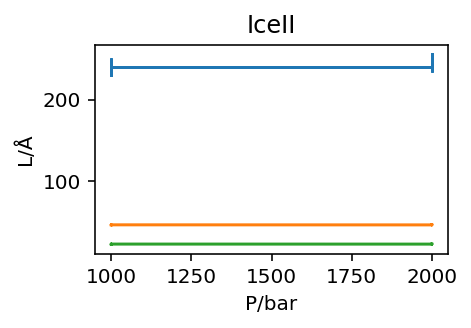

In [6]:


plt.subplot(121)
plt.title('IceII')
box_IceII=[]
for key in sims.keys():
    ls=key.split('_')
    p=float(ls[1].replace('atm',''))
    t=float(ls[2].replace('K',''))
    if 'IceII' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['cella'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['cellb'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['cellc'][NIGNORE:])

        box_IceII.append([p,t,np.mean(sim['cella'][NIGNORE:]),
                         np.mean(sim['cellb'][NIGNORE:]),
                         np.mean(sim['cellc'][NIGNORE:]),
                         np.mean(sim['cellalpha'][NIGNORE:]),
                         np.mean(sim['cellbeta'][NIGNORE:]),
                         np.mean(sim['cellgamma'][NIGNORE:])])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(221)
plt.title('IceII')
box_IceII=np.array(box_IceII)
box_IceII=box_IceII[np.argsort(box_IceII[:,0])]
plt.plot(box_IceII[:,0],box_IceII[:,1:4])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')

plt.tight_layout()


In [7]:
with open('avg_IceII_box.dat','w') as fp_out:
    for val in box_IceII:
        fp_out.write('{:8}{:8}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}\n'.format(val[0],val[1],val[2],val[3],val[4],val[5],val[6],val[7]))
!cat avg_IceII_box.dat

  1000.0   230.0    46.976    23.491    30.894     68.79    134.21    113.15
  1000.0   245.0    47.033    23.518    30.931    68.784    134.21    113.15
  1000.0   250.0    47.056    23.529    30.944    68.786    134.21    113.15
  1000.0   235.0    46.995    23.496    30.904    68.789    134.22    113.15
  1000.0   240.0    47.015    23.509    30.919    68.788    134.22    113.14
  2000.0   240.0    46.937    23.469    30.862    68.801    134.27    113.16
  2000.0   250.0    46.975    23.488    30.884    68.797    134.26    113.16
  2000.0   235.0    46.921    23.462    30.847    68.802    134.27    113.16
  2000.0   245.0    46.955     23.48    30.871    68.801    134.27    113.16
  2000.0   255.0    46.996    23.499    30.897    68.801    134.26    113.16


## Plot of radial distributions for all simulations

In [8]:
sims_result=dict()
dr=0.05
start=500

for key in sims.keys():
    sims_result[key]=dict()
    try:
        u = MDAnalysis.Universe(key+"/water.data", key+"/dump.dcd", format="LAMMPS")
    except:
         u = MDAnalysis.Universe(key+"/iceII.data", key+"/dump.dcd", format="LAMMPS")
    u.pbc=True
    atoms=u.select_atoms("type 2")
    RDF=rdf.InterRDF(atoms,atoms,range=(1.-.5*dr,11.+0.5*dr),nbins=1+int(10./dr)).run(start=start)
    sims_result[key]['rdf']=RDF

(0.0, 8.0)

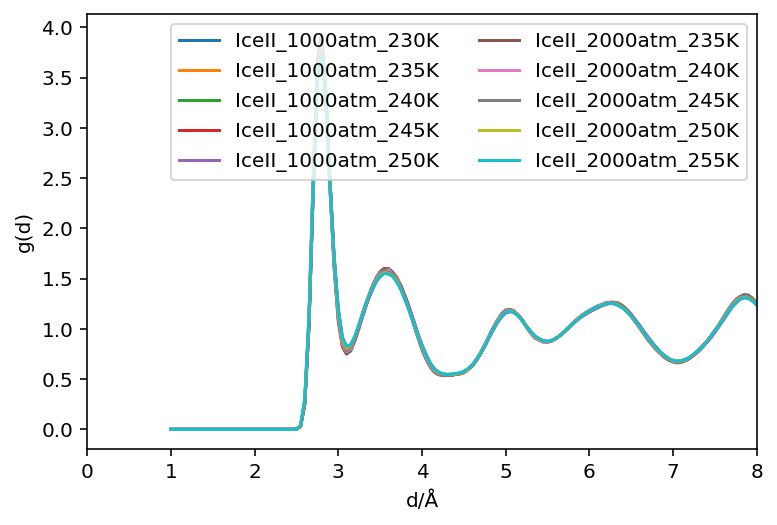

In [9]:
for key in sorted(sims_result.keys()):
    plt.plot(sims_result[key]['rdf'].results.bins,sims_result[key]['rdf'].results.rdf,label=key)
#data=np.loadtxt('rdf_rigid_1atm_300K.dat')
#plt.plot(data[:,0],data[:,1],label='ref 300K')
plt.xlabel('d/Å')
plt.ylabel('g(d)')
plt.legend(ncol=2)
plt.xlim([0,8])